# dormspam-the-game (Part 1)
A post by Kathleen E. for the MIT Admissions Blogs

More about dormspam-the-game here: https://dormspam-the-game.mit.edu/

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Data

Photo of map from https://whereis.mit.edu (saved to disk):

In [2]:
im = plt.imread("map.png")

Hand-identified coordinates of each location on map:

In [3]:
locations = {"Atlas Center": [653, 110],
            "Big Dome": [555, 165],
            "Borderline Tunnel": [625, 127],
            "Briggs Field": [375, 260],
            "Edgerton Center": [577, 172],
            "Green Building": [617, 146],
            "Hayden Library": [619, 181],
            "Killian Court": [565, 190],
            "Kresge Auditorium": [485, 215],
            "Little Dome": [528, 182],
            "Lobby 7": [528, 182],
            "Lobby 10": [557, 170],
            "MIT Media Lab": [660, 135],
            "MIT Medical": [680, 124],
            "Saté Grill Food Truck": [610, 115],
            "Stata Lobby": [589, 107],
            "Stud 5": [485, 190],
            "Verdes": [495, 185],
            "Walker 3rd": [641, 176],
            "Z Center": [468, 198]}

Import Game 1 data:

In [4]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSPBnCqsAIbyPnYmsV7rdMadlLe0lU9gT_xOYKIkmqKyuSo3V0B3PPvGOxOd_wC-hHFWpCmdkhgQBID/pub?gid=1461548545&single=true&output=csv"
data = pd.read_csv(url)
data.head(2)

,Rank,Username,Score,Hide Place,Seek Place,Tiebreaker
0,1,shahul,40.006,Stata Lobby,Atlas Center,250
1,2,idkwhatsgoingon,40.006,Stata Lobby,Atlas Center,500


Count number of hiders/seekers in each location and generate an point size for the scatter plot

In [5]:
hide_area = data["Hide Place"].value_counts()
hide_radius = hide_area**1.3 # scale a bit to have more dramatic differentiation
seek_area = data["Seek Place"].value_counts()
seek_radius = seek_area**1.3

### Make a gif showing hider and seeker hotspots

In [6]:
hide_color = "#3A57FF"
seek_color = "#FF3AB2"

In [ ]:
num_rings_seq = [0, 1, 2, 3, 4, 5, 6, 7, 7, 7, 7] # repeated 7s to give gif a pause
img_no = 0 # for file naming

for num_rings in num_rings_seq: # iterate over # of rings, each iteration is a different image
    
    fig = plt.figure(dpi = 300) # set up figure
    plt.imshow(im) # display image
    
    # artificial points for legend
    plt.scatter(0, 0, s = 75, color = hide_color, alpha = 0.7, marker = "s")
    plt.scatter(0, 0, s = 75, color = seek_color, alpha = 0.7, marker = "s")
                
    for place, loc in locations.items():    
        x = [loc[0]] # split list into two lists
        y = [loc[1]]
        
        # calculate alpha value for central point for each color
        num_hide = hide_area[place]
        num_seek = seek_area[place]
        total = num_hide + num_seek
        hide_alpha = num_hide / total
        seek_alpha = (num_seek / total) - 0.1 # 0.1 decrease because it is overlaid
        
        # plot hiding points
        size = hide_radius[place]
        offset = [size + size*2*i for i in range(num_rings)] # calculate offset of rings
        linewidth = size/70
        fade = [0.8, 0.7, 0.6, 0.4, 0.2, 0.1, 0.07]
    
        for i in range(num_rings): # rings
            plt.scatter(x, y, s = hide_radius[place]+offset[i], edgecolor = hide_color, c = "", alpha = fade[i], linewidth = linewidth)
        
        # central hiding point
        plt.scatter(x, y, s = hide_radius[place], edgecolor = "k", c = hide_color, alpha = hide_alpha)
        
        # plot seeking points
        size = seek_radius[place]
        offset = [size + size*2*i for i in range(num_rings)]
        linewidth = size/70
        fade = [0.7, 0.6, 0.5, 0.3, 0.2, 0.1, 0.06]
        
        for i in range(num_rings): # rings
            plt.scatter(x, y, s = seek_radius[place]+offset[i],  edgecolor = seek_color, c = "", alpha = fade[i], linewidth = linewidth)
        
        # central seeking point
        plt.scatter(x, y, s = hide_radius[place], edgecolor = "k", c = seek_color, alpha = seek_alpha)
        
    plt.axis("off") # remove axes
    plt.xlim(250,750) # crop map
    plt.ylim(370,65)
    plt.title("Game 1: Hide and Seek", fontsize = 12)
    plt.legend(["Hide", "Seek"], loc = "lower right", fontsize = 8) # create legend
    plt.tight_layout() # reduce whitespace
    plt.savefig("./game1/map_gif/"+str(img_no).zfill(2)+".png")
    
    img_no += 1 # increment im_no for file naming

    plt.close(fig) # close to prevent memory issues
    

### Animate movement of individuals

In [7]:
# radius of where points are allowed to sit for each location
location_spread = {"Atlas Center": 6,
            "Big Dome": 5,
            "Borderline Tunnel": 8,
            "Briggs Field": 12,
            "Edgerton Center": 5,
            "Green Building": 5,
            "Hayden Library": 7,
            "Killian Court": 7,
            "Kresge Auditorium": 8,
            "Little Dome": 5,
            "Lobby 7": 10,
            "Lobby 10": 6,
            "MIT Media Lab": 6,
            "MIT Medical": 6,
            "Saté Grill Food Truck": 6,
            "Stata Lobby": 7,
            "Stud 5": 5,
            "Verdes": 4,
            "Walker 3rd": 8,
            "Z Center": 8}


In [8]:
def spread_points(center, max_radius, num_points, raw = False):
    """
    Function to jitter points randomly about a center
    
    center is a list of [x, y], typically the value from the locations dictionary
    
    max_radius is an int for the maximum radius a point can be jittered from the center, typically the value from the location_spread dictionary
    
    num_points is an int for the number of points that should be generated
    
    raw is a boolean (default False) that determines if a list of coordinates is returned or just two raw ints (in the case where num_points == 1)
    """
    x_val = center[0]
    y_val = center[1]
    
    x_data = []
    y_data = []
    for i in range(num_points):
        theta = np.random.uniform(0, 2*np.pi) # select random angle
        radius = np.random.uniform(0, max_radius) # select random radius within correct range
        
        x_prime = x_val + (radius * np.cos(theta))
        y_prime = y_val + (radius * np.sin(theta))
        
        x_data.append(x_prime)
        y_data.append(y_prime)
    
    if raw: # just get singular ints
        return x_data[0], y_data[0]
    # return lists
    return x_data, y_data

In [9]:
# generate full paths for every individual\
paths = []
for i in range(len(data)):
    hiding_place = data["Hide Place"][i] # string name
    seeking_place = data["Seek Place"][i]
    
    hiding_loc = locations[hiding_place] # coord loc
    seeking_loc = locations[seeking_place]
    
    hx, hy = spread_points(hiding_loc, location_spread[hiding_place], 1, raw = True) # jitter across region
    sx, sy = spread_points(seeking_loc, location_spread[seeking_place], 1, raw = True)
    
    xdir = np.sign(sx - hx) # pos if seek > hide, else neg
    ydir = np.sign(sy - hy)
    
    path_length = 40
    
    x_step = xdir * np.abs(sx - hx)/path_length # calculate the size of a step if it needs 10 steps    
    x_path = np.arange(hx, sx+x_step, x_step) # add step so the last point is included in the array
    
    y_step = ydir * np.abs(sy - hy)/path_length
    y_path = np.arange(hy, sy+y_step, y_step)
    
    # even the lengths of the paths if needed
    if len(x_path) > len(y_path):
        y_path = np.append(y_path, [y_path[-1] + y_step/10])
    elif len(y_path) > len(x_path):
        x_path = np.append(x_path, [x_path[-1] + x_step/10])
    
    # introduce some randomness
    x_jitter = np.asarray([0] + list(np.random.uniform(0, 6, len(x_path)-2)) + [0])
    y_jitter = np.asarray([0] + list(np.random.uniform(0, 4, len(y_path)-2)) + [0])
    
    paths.append([x_path+x_jitter, y_path+y_jitter])

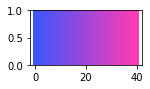

In [12]:
# create color gradient
import matplotlib as mpl

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1=hide_color
c2=seek_color
n=40 # number of colors

# display gradient
fig, ax = plt.subplots(figsize=(2, 1))
for x in range(n+1):
    ax.axvline(x, color=colorFader(c1,c2,x/n), linewidth=4) 
plt.show()

In [ ]:
im_no = 0 
path_lengths = [i for i in range(46)]
final_iter = 0 # for reducing trailing points once final destination is reached

for spot in path_lengths:
    
    fig = plt.figure(dpi = 270) # set up figure every time
    plt.imshow(im) # display image
    
    # legend plot
    plt.scatter(0, 0, edgecolor = "k", c = colorFader(c1,c2,0/n), alpha = 0.7, s = 30, linewidth = 0.5)
    plt.scatter(0, 0, edgecolor = "k", c = colorFader(c1,c2,38/n), alpha = 0.7, s = 30, linewidth = 0.5)
    
    for path in paths:
        x_path, y_path = path # separate components
        
        ind = min(spot, 39) # for > 39, reduce to 39
        
        # main spot
        plt.scatter(x_path[ind], y_path[ind], edgecolor = "k", c = colorFader(c1,c2,ind/n), alpha = 0.5, s = 10, linewidth = 0.5)
        
        for i in range(4-final_iter):
            if ind-i >= 0:
                try:
                    plt.scatter(x_path[ind-i], y_path[ind-i], c = colorFader(c1,c2,ind/n), alpha = 0.3 - 0.05*i, s = 10 - i*2, linewidth = 0.5)
                except:
                    break

    plt.axis("off") # crop map and remove axis
    plt.xlim(250,750)
    plt.ylim(370,65)
    
    plt.legend(["Hiding Spots", "Seeking Spots"], loc= "lower right", fontsize = 8)
    
    plt.title("Game 1: Hide and Seek", fontsize = 12)
    plt.tight_layout() # reduce whitespace
    plt.savefig("./game1/movement_map/" + str(im_no).zfill(2) + ".png")
    im_no += 1
    
    # save extra copies of the start and end to create a "pause" effect in the gif
    if spot == 0:
        for i in range(30):
            plt.savefig("./game1/movement_map/" + str(im_no).zfill(2) + ".png")
            im_no += 1
    elif spot >= 39: 
        final_iter += 1 # remove trailing points by incrementing this var
    
    if spot == 45:
        for i in range(30):
            plt.savefig("./game1/movement_map/" + str(im_no).zfill(2) + ".png")
            im_no += 1
    
    plt.close()


### Analysis

#### Possible Combinations

In [13]:
len(locations) * len(locations)
# calculate total number of combos achieved vs number possible

400

In [16]:
pairs = {}

for i in range(len(data)):
    pair = (data["Hide Place"][i] , data["Seek Place"][i])
    
    if pair in pairs:
        pairs[pair] += 1
    else:
        pairs[pair] = 1

In [17]:
len(pairs)

186

186 out of 400 possible pairs were chosen

#### Top choice

In [18]:
sorted_pair_list = sorted(pairs.items(), key = lambda x : x[1], reverse = True)
print(sorted_pair_list[0])

(('Edgerton Center', 'Borderline Tunnel'), 9)


#### Number of repeats in combo selection

In [19]:
repeats = [item for item in sorted_pair_list if item[1] > 1]
len(repeats)

88

#### Tiebreaker and score stats

In [20]:
# median of tiebreaker estimate is the same as the actual number of players
print(data["Tiebreaker"].median())
assert (data["Tiebreaker"].median() == len(data))

341.0


In [21]:
data["Tiebreaker"].mean()

522.0615835777126

In [22]:
data["Score"].median()

-1.9880000000000002